In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import imghdr 
import cv2
import os

In [94]:
for dirpath, dirnames, filenames in os.walk('R7-M10'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'R7-M10'.
There are 2 directories and 0 images in 'R7-M10\test'.
There are 0 directories and 32 images in 'R7-M10\test\messi'.
There are 0 directories and 25 images in 'R7-M10\test\ronaldo'.
There are 2 directories and 0 images in 'R7-M10\train'.
There are 0 directories and 85 images in 'R7-M10\train\messi'.
There are 0 directories and 120 images in 'R7-M10\train\ronaldo'.


Get class name

In [95]:
import pathlib
import numpy as np
data_dir = pathlib.Path("R7-M10/train") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)

['messi' 'ronaldo']


In [96]:
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (900, 1600, 3)


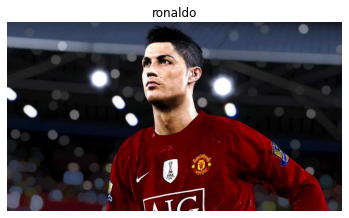

In [82]:
# View a random image from the training dataset
img = view_random_image(target_dir="R7-M10/train/",
                        target_class="ronaldo")

In [83]:
img/255.

array([[[0.18039216, 0.22745098, 0.32941176],
        [0.18039216, 0.22745098, 0.32941176],
        [0.18039216, 0.22745098, 0.32941176],
        ...,
        [0.0627451 , 0.07843137, 0.1254902 ],
        [0.0627451 , 0.07843137, 0.1254902 ],
        [0.0627451 , 0.07843137, 0.1254902 ]],

       [[0.18039216, 0.22745098, 0.32941176],
        [0.18039216, 0.22745098, 0.32941176],
        [0.18039216, 0.22745098, 0.32941176],
        ...,
        [0.0627451 , 0.07843137, 0.1254902 ],
        [0.0627451 , 0.07843137, 0.1254902 ],
        [0.0627451 , 0.07843137, 0.1254902 ]],

       [[0.18431373, 0.23137255, 0.33333333],
        [0.18431373, 0.23137255, 0.33333333],
        [0.18431373, 0.23137255, 0.33333333],
        ...,
        [0.07058824, 0.07843137, 0.1254902 ],
        [0.07058824, 0.07843137, 0.1254902 ],
        [0.07058824, 0.07843137, 0.1254902 ]],

       ...,

       [[0.18431373, 0.14117647, 0.17254902],
        [0.18823529, 0.14509804, 0.17647059],
        [0.19215686, 0

In [84]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [97]:
tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = 'R7-M10/train'
test_dir = 'R7-M10/test'

train_data = train_datagen.flow_from_directory(train_dir,batch_size=32,target_size=(64,64),class_mode='binary',seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,batch_size=32,target_size=(64,64),class_mode='binary',seed=42)

Found 205 images belonging to 2 classes.
Found 57 images belonging to 2 classes.


In [98]:
tf.random.set_seed(42)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=32, 
                         kernel_size=3, # can also be (3, 3)
                         activation="relu", 
                         input_shape=(64, 64, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(64, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                          padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64,activation='relu'),
  tf.keras.layers.Dense(28,activation='relu'),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(learning_rate=.0001),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=50,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/50
7/7 [==============================] - 3s 373ms/step - loss: 0.6870 - accuracy: 0.5561 - val_loss: 0.7012 - val_accuracy: 0.4386
Epoch 2/50
7/7 [==============================] - 2s 342ms/step - loss: 0.6690 - accuracy: 0.5854 - val_loss: 0.7289 - val_accuracy: 0.4386
Epoch 3/50
7/7 [==============================] - 2s 326ms/step - loss: 0.6606 - accuracy: 0.5854 - val_loss: 0.7374 - val_accuracy: 0.4386
Epoch 4/50
7/7 [==============================] - 2s 314ms/step - loss: 0.6560 - accuracy: 0.5854 - val_loss: 0.7272 - val_accuracy: 0.4386
Epoch 5/50
7/7 [==============================] - 2s 322ms/step - loss: 0.6500 - accuracy: 0.5854 - val_loss: 0.7228 - val_accuracy: 0.4386
Epoch 6/50
7/7 [==============================] - 2s 314ms/step - loss: 0.6467 - accuracy: 0.5854 - val_loss: 0.7341 - val_accuracy: 0.4386
Epoch 7/50
7/7 [==============================] - 2s 355ms/step - loss: 0.6378 - accuracy: 0.5854 - val_loss: 0.7267 - val_accuracy: 0.4386
Epoch 8/50
7/7 [====

In [99]:
model_1.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_29 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 conv2d_30 (Conv2D)          (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 30, 30, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_31 (Conv2D)          (None, 28, 28, 10)        5770      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 14, 14, 10)       0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1960)             

In [100]:
model_1.evaluate(valid_data)

2/2 [==============================] - 0s 124ms/step - loss: 0.6946 - accuracy: 0.6667


[0.6946091055870056, 0.6666666865348816]

In [101]:
def load_and_prep_image(filename, img_shape=64):
  """
  Reads an image from filename, turns it into a tensor
  and reshapes it to (img_shape, img_shape, colour_channel).
  """
  # Read in target file (an image)
  img = tf.io.read_file(filename)

  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)

  # Resize the image (to the same size our model was trained on)
  img = tf.image.resize(img, size = [img_shape, img_shape])

  # Rescale the image (get all values between 0 and 1)
  img = img/255.
  return img

In [103]:
def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)
  plt.show();

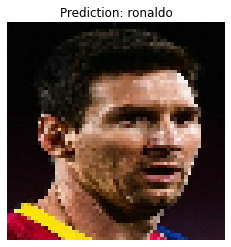

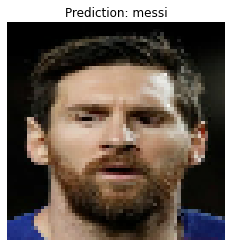

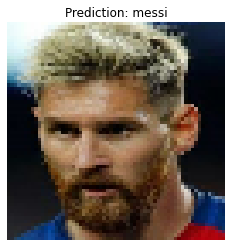

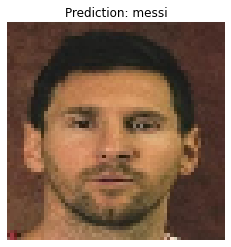

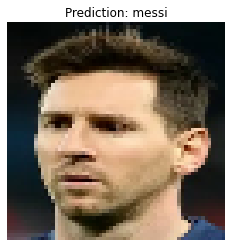

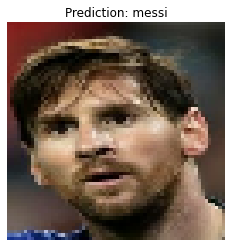

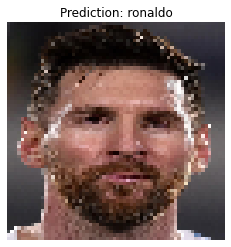

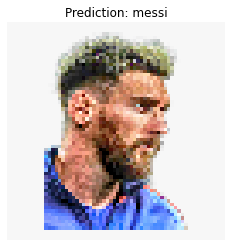

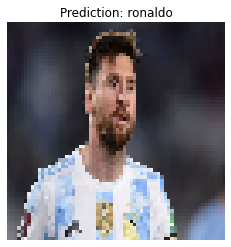

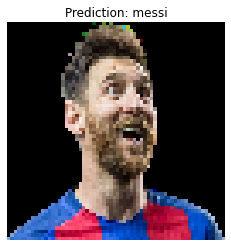

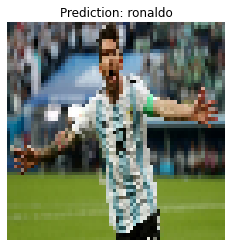

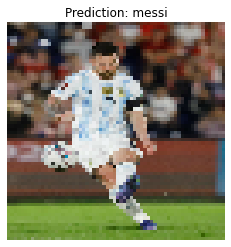

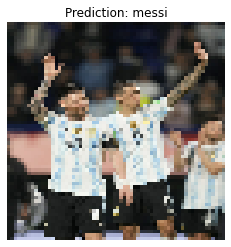

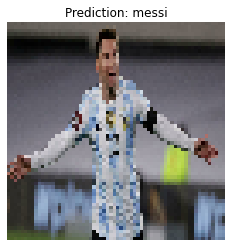

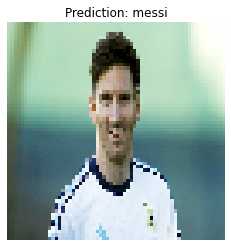

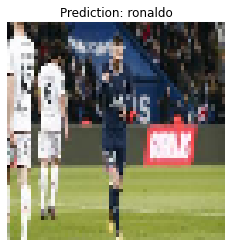

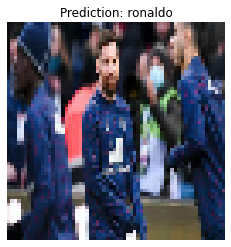

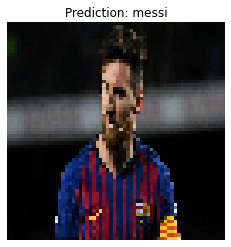

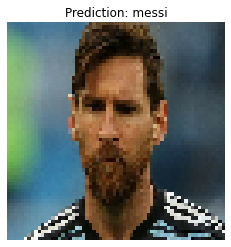

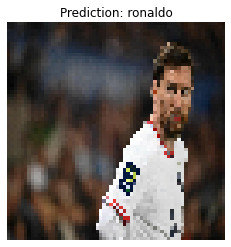

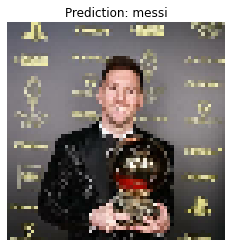

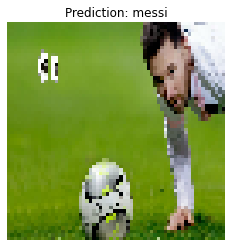

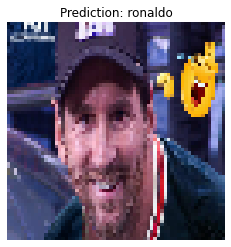

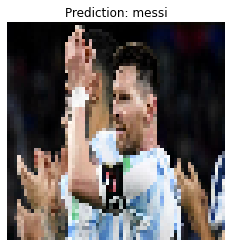

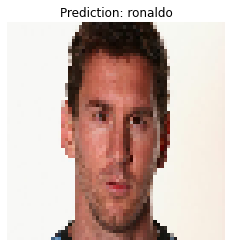

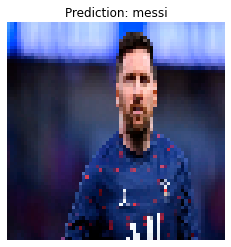

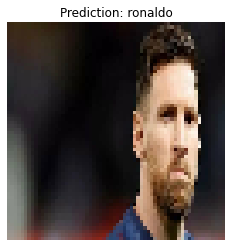

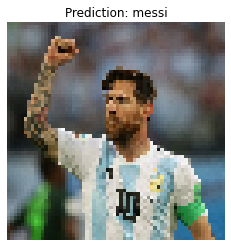

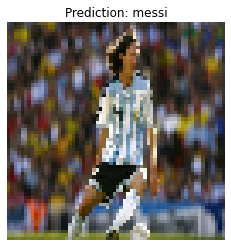

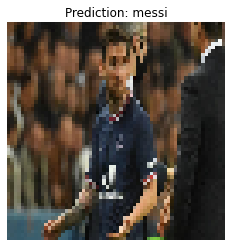

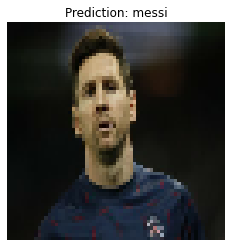

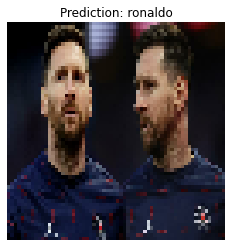

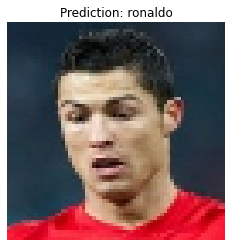

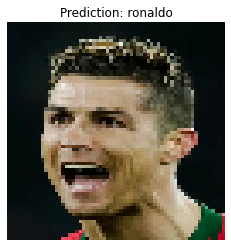

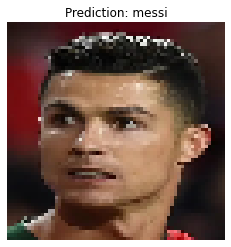

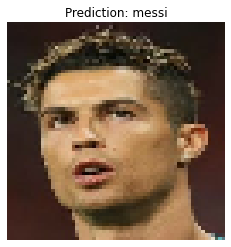

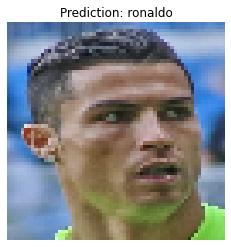

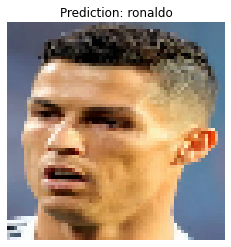

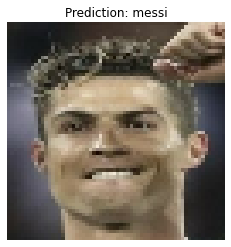

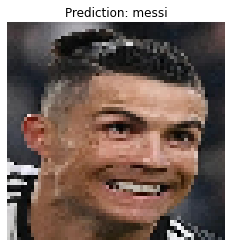

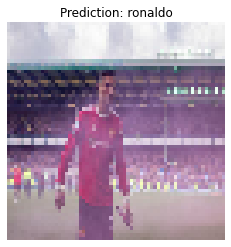

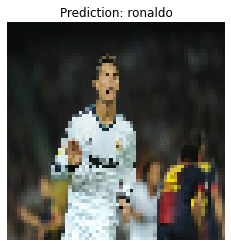

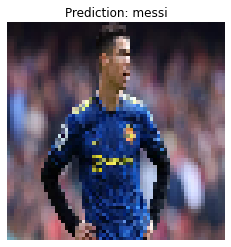

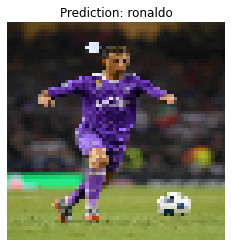

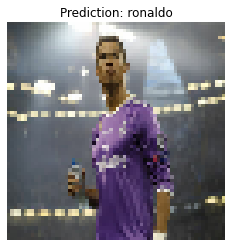

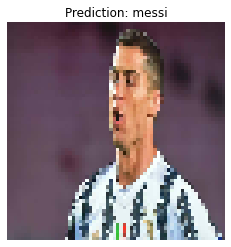

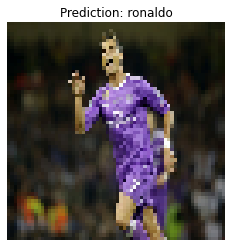

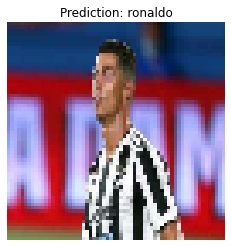

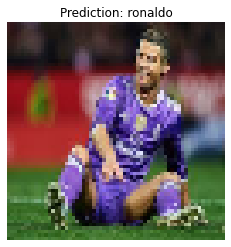

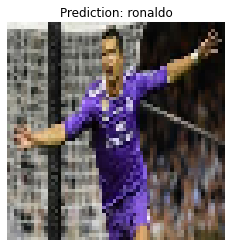

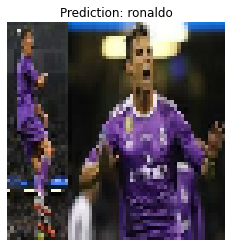

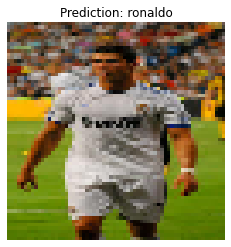

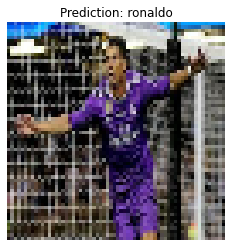

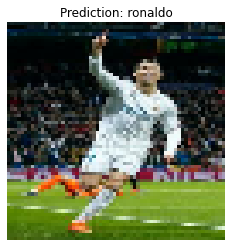

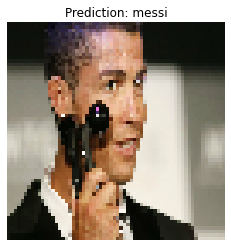

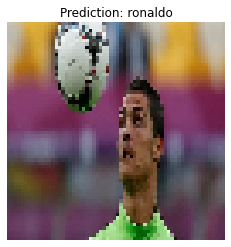

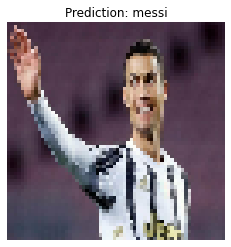

In [104]:
data_dir = 'R7-M10'
for data in os.listdir(data_dir): 
    if data == 'test' :
        for folder in os.listdir(os.path.join(data_dir,data)):
            for image in os.listdir(os.path.join(data_dir,data,folder)):
                image_path = os.path.join(data_dir,data,folder,image)
                try:
                    pred_and_plot(model_1,image_path,class_names)
                except :
                    os.remove(image_path)

### Save model 

In [105]:
model_1.save('CR7orM10.h5')

In [107]:
model = tf.keras.models.load_model('CR7orM10.h5')

In [115]:
def IsCR7orM10(image_path):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(image_path)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  pred_class = class_names[int(tf.round(pred)[0][0])]

  # Plot the image and predicted class
  show_image = plt.imread(image_path)
  plt.imshow(show_image)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False)
  plt.show();
  return pred_class
    

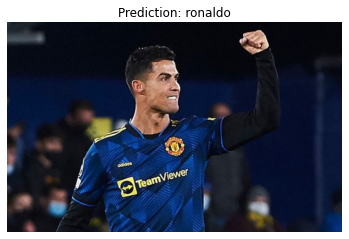

'ronaldo'

In [116]:
IsCR7orM10('R7-M10/123258861_251n.jpg')